In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
# Sets the number of examples
M = 100

# Reset pseudo random number generator so that the results are reproducible
np.random.seed(42)

# Create target function and its noisy versionx 
x = 6*np.random.rand(M, 1) - 3
y = 2 + x + 0.5*x**2
y_noisy = y + np.random.randn(M,1)
                              
Mtest = 100
x_test = np.linspace(-3, 3, Mtest).reshape(Mtest, 1)
y_test = 2 + 0.5*x_test + np.random.randn(Mtest, 1)

In [23]:
x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.7, random_state=42)


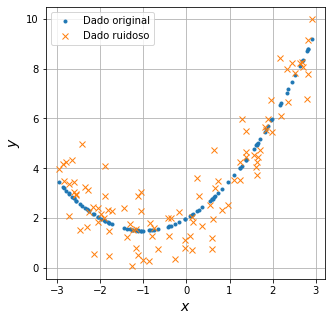

In [24]:
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, '.', label='Dado original')
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
# plt.savefig("target_function.png", dpi=600)
plt.show()

In [25]:
include_bias = True

model_order = 90

In [26]:
# Regularization factor
lambdas = np.linspace(10**-10, 1, 1000)

In [27]:
train_errors, val_errors, test_errors = [], [], []
minimum_val_error = float("inf")
best_epoch = None
best_model = None
best_lambda = None

for i in range(0,len(lambdas)):
    # Instantiate a polynomial with the given degree.
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a Ridge regressor.
    reg = Lasso(alpha=lambdas[i], tol=1, random_state=42) if lambdas[i] > 0 else LinearRegression()
    # Create a pipeline of actions.
    model = Pipeline([
        ("poly_features", poly_features),
        ("scaler", scaler),
        ("reg", reg),
    ])
    # Train model.
    model.fit(x_train, y_train)
    # Predict.
    y_train_predict = model.predict(x_train)
    y_val_predict = model.predict(x_val)
    y_test_predict = model.predict(x_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))
    
    if val_errors[i] < minimum_val_error:
        minimum_val_error = val_errors[i]
        best_epoch = i
        best_model = clone(model)
        best_lambda = lambdas[i]
        
print('best_epoch:',best_epoch)
print('best_lambda:',best_lambda)
print('minimum_val_error:',minimum_val_error)

best_epoch: 25
best_lambda: 0.025025025122522526
minimum_val_error: 0.7682727062847716


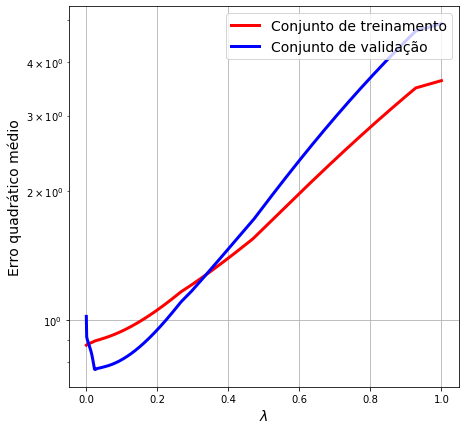

In [28]:
fig = plt.figure(figsize=(7,7))

plt.plot(lambdas, train_errors, "r", linewidth=3, label="Conjunto de treinamento")
plt.plot(lambdas, val_errors, "b", linewidth=3, label="Conjunto de validação")
plt.legend(loc="upper right", fontsize=14)
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel("Erro quadrático médio", fontsize=14)
plt.grid()
plt.show()

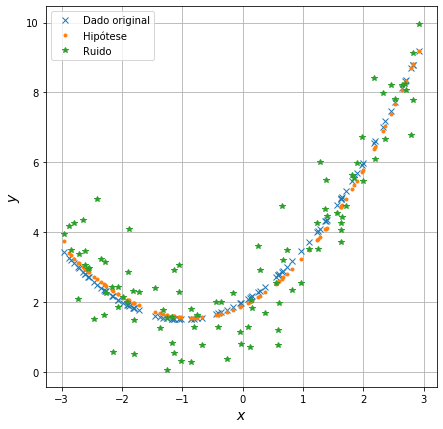

In [29]:
best_model.fit(x_train, y_train)

fig = plt.figure(figsize=( 7,7))
plt.plot(x, y, 'x', label='Dado original')
plt.plot(x, best_model.predict(x), '.', label='Hipótese')
plt.plot(x, y_noisy, '*', label='Ruido')
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)
plt.legend()
plt.grid()
# plt.savefig("target_function.png", dpi=600)
plt.show()

In [30]:

include_bias = True

train_errors, val_errors, test_errors = [], [], []
minimum_val_error = float("inf")
best_epoch = None
best_model = None
best_lambda = None

for i in range(0,len(lambdas)):

    # Instantiate a polynomial with the given degree
    poly_features = PolynomialFeatures(degree=model_order, include_bias = include_bias)
    # Instantiate a scaler that will standardize the features
    std_scaler = StandardScaler()
    # Instantiate a Ridge regressor
    # reg = Ridge(alpha=lambdas[i], solver="cholesky")
    reg = Ridge(alpha=lambdas[i], tol=1)
    # Create a pipeline of actions
    model = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("reg", reg),
    ])
    # Train model
    model.fit(x, y_noisy)
    # Predict
    y_test_regul = model.predict(x_test)
    # Calculates the error
    test_errors.append((mean_squared_error(y_test, y_test_regul)))
    # Saves the minimmum error value and lambda
    if test_errors[i] < minimum_val_error:
        minimum_val_error = test_errors[i]
        best_epoch = i   
        best_model = clone(model)
        best_lambda = lambdas[i]
        

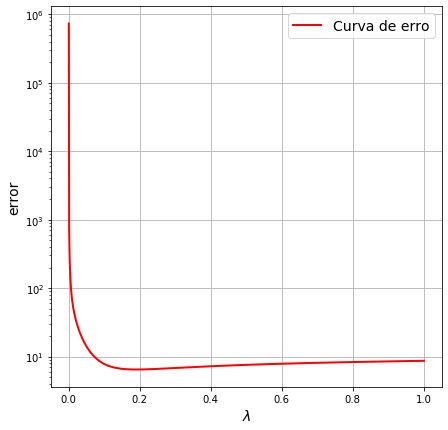

In [31]:
# Plot error
fig = plt.figure(figsize=(7,7))
plt.plot(lambdas, test_errors, "r", linewidth=2, label="Curva de erro")
plt.legend(loc="upper right", fontsize=14)
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=14)
plt.ylabel('error', fontsize=14)
plt.grid()
# Save figure
# plt.savefig("ridge_regression_error.png", dpi=600)
plt.show()

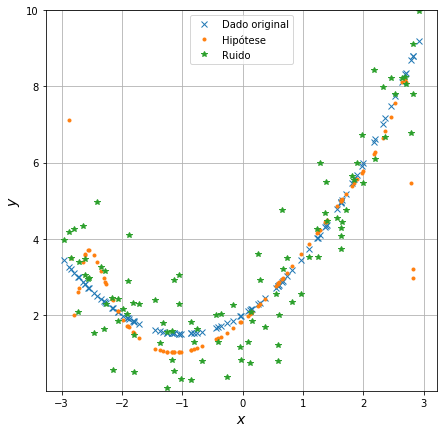

In [41]:
best_model.fit(x_train, y_train)

fig = plt.figure(figsize=( 7,7))
plt.plot(x, y, 'x', label='Dado original')
plt.plot(x, best_model.predict(x), '.', label='Hipótese')
plt.ylim([0.001, 10])
plt.plot(x, y_noisy, '*', label='Ruido')
plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$y$', fontsize = 14)
plt.legend()
plt.grid()
# plt.savefig("target_function.png", dpi=600)
plt.show()


In [42]:
# Print coefs
print('Lambda: %1.4e:' % (best_lambda))
print(best_model.named_steps['reg'].intercept_)
print(best_model.named_steps['reg'].coef_)

Lambda: 1.9019e-01:
[3.18408431]
[[ 0.00000000e+00  2.38180911e+00  1.22082371e+00 -5.84299349e-01
  -9.01105687e-02 -6.02741149e-01  1.30763654e-01 -2.80955316e-01
   2.96771927e-01 -4.78727837e-02  2.89777093e-01  9.02467513e-02
   1.97928769e-01  1.69632478e-01  8.75191866e-02  2.12084237e-01
  -1.00480427e-02  2.28285530e-01 -8.37810296e-02  2.24517380e-01
  -1.32540507e-01  2.05796566e-01 -1.59447320e-01  1.76733157e-01
  -1.69102983e-01  1.41516536e-01 -1.66225760e-01  1.03719927e-01
  -1.55011644e-01  6.61677594e-02 -1.38884296e-01  3.09125694e-02
  -1.20456861e-01 -7.01321843e-04 -1.01603449e-01 -2.79247903e-02
  -8.35787457e-02 -5.04735171e-02 -6.71493446e-02 -6.84017417e-02
  -5.27168241e-02 -8.19920318e-02 -4.04232158e-02 -9.16658531e-02
  -3.02359843e-02 -9.79152279e-02 -2.20132787e-02 -1.01253325e-01
  -1.55519653e-02 -1.02180786e-01 -1.06215592e-02 -1.01164402e-01
  -6.98713254e-03 -9.86250546e-02 -4.42392854e-03 -9.49322794e-02
  -2.72594357e-03 -9.04033783e-02 -1.710267